<h1 style="text-align: center;">✨THE LUSCHER ZETA FUNCTION✨</h1>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import numpy.ma as ma

$$
Z_{0,0}(1; q^2) = \frac{1}{\sqrt{4\pi}} \lim_{\Lambda \to \infty} \left( \sum\limits^{|\mathbf{n}| < \Lambda}_{\mathbf{n}} \frac{1}{|\mathbf{n}|^2 - q^2} - 4\pi \Lambda \right)
$$

In [30]:
@njit
def norm_squared(x, y, z):
    return x*x + y*y + z*z


@njit
def Z_00(q2, L_max, epsilon=1e-6, l=0):
    Z_value = 0.0 + 0.0j

    for x in range(-L_max, L_max + 1):  
        for y in range(-L_max, L_max + 1):
            for z in range(-L_max, L_max + 1):
                r2 = norm_squared(x, y, z)
                if r2 >= L_max**2:
                    continue
                
                if r2 == 0 and abs(q2) >= 1e-12:
                    Z_value += (-1.0 / q2) * r2**(l / 2)
                    continue
                
                denominator = (r2 - q2) + epsilon * 1j
                Z_value += (r2**(l / 2)) / denominator

    return (Z_value.real - 4.*np.pi*L_max) / np.sqrt(4 * np.pi) # /sqrt{4 * pi} bc of Y_{l

In [31]:
# Range of q^2 values
q2_values = np.linspace(-4, 8, 3200)
Z_values = [Z_00(q2, L_max=40, epsilon=1e-6) for q2 in q2_values]

@njit
def generate_lattice_points(L_max): # for vertical dashed lines
    unique_squared_norms = set()
    for x in range(-L_max, L_max + 1):
        for y in range(-L_max, L_max + 1):
            for z in range(-L_max, L_max + 1):
                unique_squared_norms.add(norm_squared(x, y, z))
    return sorted(unique_squared_norms)

n_squared_values = generate_lattice_points(L_max=30) # Energy levels plt.figure(figsize=(8, 6))


Now, we plot!

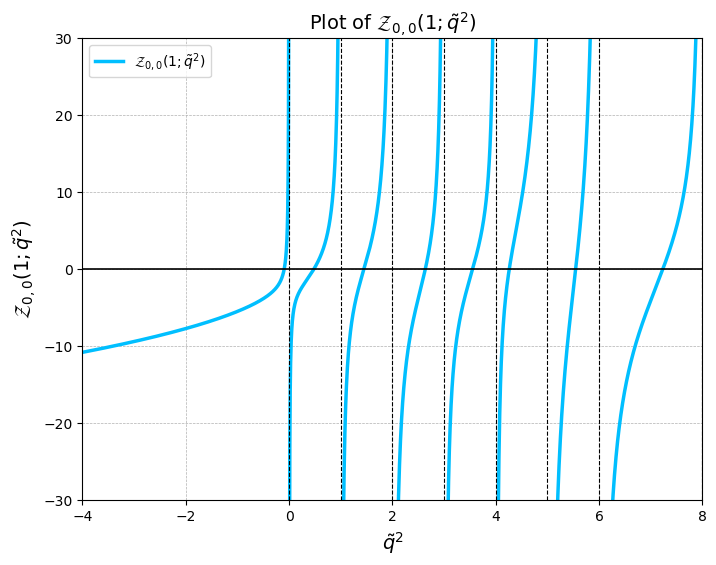

In [32]:
mask = np.zeros_like(q2_values, dtype=bool) # to not show the solid lines at the poles
for n2 in [0, 1, 2, 3, 4, 5, 6, 8]:
    mask |= np.abs(q2_values - n2) < 1e-3
Z_masked = ma.masked_where(mask | (np.abs(Z_values) > 100), Z_values)

plt.figure(figsize=(8, 6))
plt.plot(q2_values, Z_masked, color='deepskyblue', linewidth=2.5, label=r'$\mathcal{Z}_{0,0}(1; \tilde{q}^2)$')

for n2 in [0, 1, 2, 3, 4, 5, 6, 8]: # dashed lines
    plt.axvline(n2, color='k', linestyle='dashed', linewidth=0.8)

plt.axhline(0, color='black', linewidth=1.2)
plt.xlabel(r'$\tilde{q}^2$', fontsize=14)
plt.ylabel(r'$\mathcal{Z}_{0,0}(1; \tilde{q}^2)$', fontsize=14)
plt.title(r'Plot of $\mathcal{Z}_{0,0}(1; \tilde{q}^2)$', fontsize=14)
plt.ylim(-30, 30)
plt.xlim(-4, 8)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


The vertical dashed lines denote  the position of the poles of the
function corresponding to the ***non-interacting energy-eigenvalues***.